In [16]:
from pathlib import Path
import xarray as xr
import clearwater_riverine as cwr

In [2]:
project_path = Path.cwd().parent
src_path = project_path / 'src'
print(project_path)
print(src_path)

#point to config
network_path = Path(r'W:\2ERDC12 - Clearwater\Clearwater_testing_NSM\plan_48_simulation')
wetted_surface_area_path = network_path / "wetted_surface_area.zarr"
q_solar_path = network_path / 'cwr_boundary_conditions_q_solar_p28.csv'
air_temp_path = network_path / 'cwr_boundary_conditions_TairC_p28.csv'
config_file = network_path / 'demo_config.yml'
print(config_file.exists())

start_index =  0 # int((8*60*60)/30)
end_index = 15  # 48*60*60
print(start_index, end_index)

transport_model = cwr.ClearwaterRiverine(
    config_filepath=config_file,
    verbose=True,
    datetime_range= (start_index, end_index)
)

c:\Users\sjordan\OneDrive - LimnoTech\Documents\GitHub\ClearWater-riverine\examples
c:\Users\sjordan\OneDrive - LimnoTech\Documents\GitHub\ClearWater-riverine\examples\src
True
0 15
Populating Model Mesh...
Calculating Required Parameters...


In [3]:
from clearwater_riverine.utilities import calculate_wetted_surface_area

In [4]:
calculate_wetted_surface_area(
    transport_model.mesh
)

In [17]:
# open previously calculated
wetted_sa = xr.open_zarr(wetted_surface_area_path)
wetted_sa = wetted_sa.compute()
wetted_sa_subset = wetted_sa.isel(time=slice(start_index, end_index+1))

In [18]:
wetted_sa

<xarray.Dataset>
Dimensions:              (nface: 444, time: 5761)
Coordinates:
  * nface                (nface) int32 0 1 2 3 4 5 6 ... 438 439 440 441 442 443
  * time                 (time) int32 0 1 2 3 4 5 ... 5756 5757 5758 5759 5760
Data variables:
    wetted_surface_area  (time, nface) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0

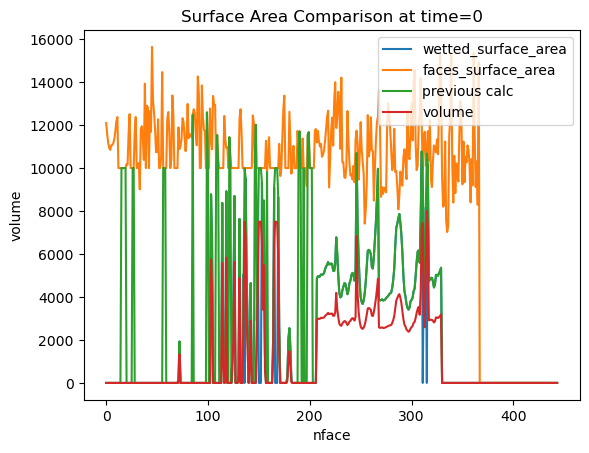

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

transport_model.mesh.wetted_surface_area.isel(time=0).plot(ax=ax, label='wetted_surface_area')
transport_model.mesh.faces_surface_area.plot(ax=ax, label='faces_surface_area')
wetted_sa.wetted_surface_area.isel(time=0).plot(ax=ax, label='previous calc')
transport_model.mesh.volume.isel(time=0).plot(ax=ax, label = 'volume')

ax.legend()
plt.title("Surface Area Comparison at time=0")
plt.show()

It looks like the old calc had some calculated surface areas in cells that had no volume, so I think our new calc may be an improvement... 
however, there may be a few isseus for the cells at around 300. 